## libs

In [1]:
# python utils
import itertools
import inspect

# pre-processing and exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# model building
from minisom import MiniSom 

## Import Data

In [3]:
df = pd.read_csv('../datasets/pima_indians_diabetes.csv', header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing Data

In [4]:
df['Outcome'] = df['Outcome'].factorize()[0]
df['Outcome'] = df['Outcome'].astype("category")
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [5]:
# split in input and output sets
input_df = df.drop("Outcome", axis=1)
output_df = df["Outcome"]

In [6]:
# normalizing values of input df between 0 and 1 (per column)
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

input_df = normalize(input_df)
input_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [7]:
# minsisom lib expects input_data as numpy matrix not pandas, converting...
input_data = input_df.values
input_data

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Model builder

In [8]:
def build_som_model(size, input_len, sigma, learning_rate):
    return MiniSom(size, size, input_len, sigma=sigma, learning_rate=learning_rate, 
                   neighborhood_function='bubble', random_seed=10)

def build_models(builder_method, *args_tests):
    """
    Build models with all the combinations of the args_test passed
    """
    builder_args_names = list(inspect.signature(builder_method).parameters.keys())
    return [
        dict((("model", builder_method(*args)),) + tuple(zip(builder_args_names, args)))
        for args in itertools.product(*args_tests)
    ]

## Models Definition

In [12]:
# Parameters definition

# fixed
input_len = [8]
size_tests = [32]

# tests
sigma_tests = [10, 5, 3, 1]
learning_rate_tests = [5, 1, 0.1, 0.01]

In [13]:
# building models with all the combinations of the test parameters
models = build_models(
    build_som_model,
    size_tests,
    input_len,
    sigma_tests,
    learning_rate_tests,
)
models

[{'model': <minisom.MiniSom at 0x7fd4433e3a10>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 5},
 {'model': <minisom.MiniSom at 0x7fd4802fc1d0>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 1},
 {'model': <minisom.MiniSom at 0x7fd4802fc2d0>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 0.1},
 {'model': <minisom.MiniSom at 0x7fd443382d90>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 0.01},
 {'model': <minisom.MiniSom at 0x7fd47c55bf90>,
  'size': 32,
  'input_len': 8,
  'sigma': 5,
  'learning_rate': 5},
 {'model': <minisom.MiniSom at 0x7fd443c874d0>,
  'size': 32,
  'input_len': 8,
  'sigma': 5,
  'learning_rate': 1},
 {'model': <minisom.MiniSom at 0x7fd443c870d0>,
  'size': 32,
  'input_len': 8,
  'sigma': 5,
  'learning_rate': 0.1},
 {'model': <minisom.MiniSom at 0x7fd4433e3e50>,
  'size': 32,
  'input_len': 8,
  'sigma': 5,
  'learning_rate': 0.01},
 {'model': <minisom.MiniSom at 0x7fd4433e3fd0>,
  

## Models Training

In [14]:
for model in models:
    model['model'].pca_weights_init(input_data)
    model['model'].train_batch(input_data, 10000, verbose=False)
    model['quantization_error'] = model['model'].quantization_error(input_data)
    model['topographic_error'] = model['model'].topographic_error(input_data)

/home/rafaelpereira/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/linalg/linalg.py:2513: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/home/rafaelpereira/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/linalg/linalg.py:2512: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/rafaelpereira/anaconda3/envs/tensorflow/lib/python3.7/site-packages/minisom.py:258: RuntimeWarning: invalid value encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)


In [15]:
models

[{'model': <minisom.MiniSom at 0x7fd4433e3a10>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 5,
  'quantization_error': nan,
  'topographic_error': 1.0},
 {'model': <minisom.MiniSom at 0x7fd4802fc1d0>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 1,
  'quantization_error': 0.19662808047555616,
  'topographic_error': 0.7942708333333334},
 {'model': <minisom.MiniSom at 0x7fd4802fc2d0>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 0.1,
  'quantization_error': 0.18801497930909408,
  'topographic_error': 0.9361979166666666},
 {'model': <minisom.MiniSom at 0x7fd443382d90>,
  'size': 32,
  'input_len': 8,
  'sigma': 10,
  'learning_rate': 0.01,
  'quantization_error': 0.23111733669923065,
  'topographic_error': 1.0},
 {'model': <minisom.MiniSom at 0x7fd47c55bf90>,
  'size': 32,
  'input_len': 8,
  'sigma': 5,
  'learning_rate': 5,
  'quantization_error': 0.7833031198716346,
  'topographic_error': 1.0},
 {'model': <minisom.MiniSom 

# Results

### Top Models

In [16]:
# Sorting models by topographic_error
for i, model in enumerate(sorted(models, key=lambda d: d['topographic_error'], reverse=False)):
    print("TOP {}:".format(i + 1))
    print("    quantization error: {}".format(model["quantization_error"]))
    print("    topographic error: {}".format(model["topographic_error"]))
    print("    map size (NxN): {}".format(model["size"]))
    print("    sigma: {}".format(model["sigma"]))
    print("    learning_rate: {}".format(model["learning_rate"]))
    print()

TOP 1:
    quantization error: 0.19662808047555616
    topographic error: 0.7942708333333334
    map size (NxN): 32
    sigma: 10
    learning_rate: 1

TOP 2:
    quantization error: 0.1278933878216695
    topographic error: 0.9153645833333334
    map size (NxN): 32
    sigma: 5
    learning_rate: 1

TOP 3:
    quantization error: 0.18801497930909408
    topographic error: 0.9361979166666666
    map size (NxN): 32
    sigma: 10
    learning_rate: 0.1

TOP 4:
    quantization error: 0.12601367357851964
    topographic error: 0.9700520833333334
    map size (NxN): 32
    sigma: 3
    learning_rate: 1

TOP 5:
    quantization error: 0.22120755768210568
    topographic error: 0.9817708333333334
    map size (NxN): 32
    sigma: 5
    learning_rate: 0.01

TOP 6:
    quantization error: 0.17028070892851954
    topographic error: 0.984375
    map size (NxN): 32
    sigma: 3
    learning_rate: 0.1

TOP 7:
    quantization error: 0.2240584005584438
    topographic error: 0.9856770833333334
    

# Analysis (using the Top 1 model)

In [32]:
model = [model for model in models if model["sigma"] == 10 and model["learning_rate"] == 1][0]

In [33]:
model

{'model': <minisom.MiniSom at 0x7fd4802fc1d0>,
 'size': 32,
 'input_len': 8,
 'sigma': 10,
 'learning_rate': 1,
 'quantization_error': 0.19662808047555616,
 'topographic_error': 0.7942708333333334}

## U-Matrix

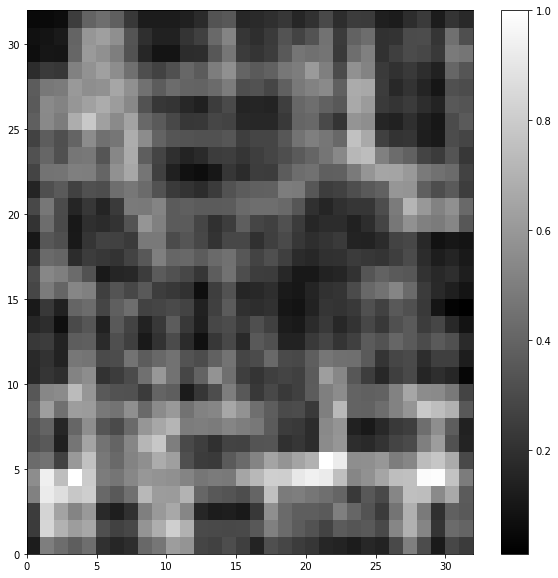

In [34]:
plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(model['model'].distance_map().T, cmap='gray')  # plotting the distance map as background
plt.colorbar()

Gray scale represent the calculated distances (normalized between 0 and 1). Black nodes represents nodes very close to its neighbors, and the white ones are nodes with a avg distance between its neighbors very high.

## U-Matrix with the classes plotted

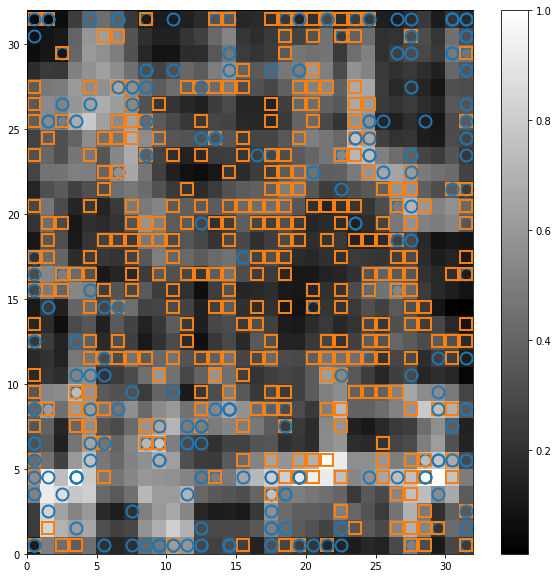

In [35]:
plt.figure(figsize=(10, 10))
plt.pcolor(model['model'].distance_map().T, cmap='gray')
plt.colorbar()

target_values = output_df.values
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(input_data):
    w = model['model'].winner(xx)  # getting the winner
    plt.plot(w[0]+.5, w[1]+.5, markers[target_values[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target_values[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 32, 0, 32])
plt.show()

From all the 3 datasets testing the SOM this os the one that the classes were less clearly separated. We can see that in the center diagonal there are more concentration of the class represented as orange color and the blue class in the extremities.

# Hit Map

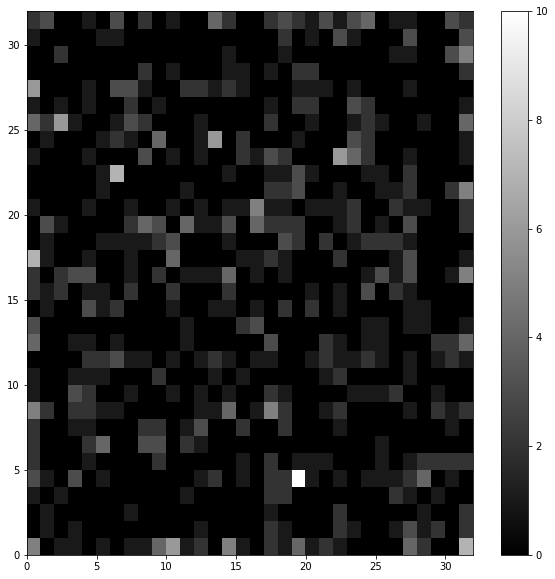

In [36]:
plt.figure(figsize=(10, 10))
frequencies = model['model'].activation_response(input_data)
plt.pcolor(frequencies.T, cmap='gray') 
plt.colorbar()
plt.show()